# Creating your First Multilayer Perceptron Classifier in Python w/ Scikit-Learn
#### Landon Buell - 24 April 2020
#### Adpated & Modified from "Hands on Machine Learning with Scikit-Learn and Tensorflow" by Aurelien Geron

The Multilayer Perceptron is a simple feed-forward architecture for neural networks developed by Frank Rosenblatt in the 1950's. It's composed of layers of "neruons" which we model as columns of floating-point numbers. The enntries on each layer-vector object are referred to activations of for the neruons in that layer. Information is passed through the network by repeated matrix- vector equations. 

Supose we have a column vector (1 x M) that contains activations for the $l$-th layer. We can produce the $l+1$ layer:
$$ x^{(l+1)} = f \Big[ \hat{W}^{(l)} \vec{x}^{(l)} + \vec{b}^{(l)} \Big] $$
where $x^{(l+1)}$ is the activation vector (1 x N) for the next layer, $\hat{W}$ is an (N x M) weighting matrix, $\vec{b}$ is a (1 x N) bias vector, and $f$ is some activation function.

For a network with $L$ layers (L-2 hidden, 1 input, 1 output), this equation is repeated $L-1$ times. The activations in the final layer correspond to the Network's final decision of a particular input sample.

## Rather than build one from the ground up:
Let's explore the scikit-learn (sklearn) impliementation of the MLP network model. sklearn is a an open-source API that has within it several smaller submodules that are all built around facilitaing a machine learning work flow for a Python 3.X user. The main documentation page can be found here:
https://scikit-learn.org/stable/

Before we import sklearn, lets import some tools for later


In [1]:
#### PRELIMINARY IMPORTS ####
import numpy as np
import matplotlib.pyplot as plt

## The Goal: Build a Digit-Image Classifier Neural Network
For this example, we'll use the classifier variant to create a "Digit-Detector Algorithm" that identifies a digit within a 28 x 28 pixel picture.  To do this, we will use a standard toy dataset called "MNIST". This is a data set modified fromt he US Postal service. You can find more details about it here:
https://en.wikipedia.org/wiki/MNIST_database

We can actully load in thus data set directly from sklearn! Note: Due to the size of the dat set, your computer may take a few seconds to completely run the next cell.

In [3]:
#### LOAD IN RAW DATA SET ####

from sklearn.datasets import fetch_openml
X,y = fetch_openml('mnist_784',version=1,return_X_y=True)

# lets examine the shape of out data:
print("Shape of design matrix:",X.shape)
print("Shape of target vector:",y.shape)

Shape of Design Matrix: (70000, 784)
Shape of target Vector: (70000,)


We can see that out design matrix $X$ is made of up $70,000$ rows by $784$ columns. This corresponds to $70,000$ samples in the data set, each one has 784 features, which are the 28 x 28 pixels. As a 'sanity check', lets examine what a sample looks like:

Image is labeled: 3


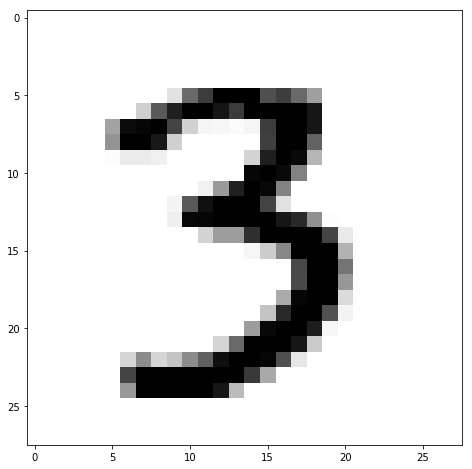

In [15]:
#### EXAMINING A SINGLE SAMPLE OF DATA ####

index = 10000
# lets pull out a single row from the design matrix
digit = X[index].reshape(28,28)
# Lets pull out the corresponding label from the tagret vector:
label = y[index]
print("Image is labeled:",label)

plt.figure(figsize=(8,8))
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

## Last Step before building our network,
Lets break data into training and testing samples, and we'll begin!

In [10]:
#### SPLIT INTO TRAINING & TESTING SAMPLES ####

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

## Creating an Sklearn MLP Classifier
Now let's actually create a neural network! We'll use the "MLPClassifier" class object from the "neural_network" submodule.

More on sklearn.neural_networks:
https://scikit-learn.org/stable/modules/neural_networks_supervised.html

More on the MLPClassifier Object:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

When we create this instance, lets give our network 2 hidden layers, each with 100 neurons. Given our data set, the input layer with have 784 neurons, which we also call "features" (one for each pixel) and 10 output neurons, which we call "classes".
Let's also use the "ReLU" activation function and the "Stochastic Gradient Descent" back propagation method to train the model as well. 

More on Stochastic Gradient Descent:
https://en.wikipedia.org/wiki/Stochastic_gradient_descent

We will also set the "random_state" parameter to a fixed value so that we produce the same results from computer to computer. This parameter simply adjusts the initial values in the entries of each weighting matrix and bias vector.

In [16]:
#### CREATE SKLEARN NETWORK INSTANCE ####

from sklearn.neural_network import MLPClassifier

My_Network = MLPClassifier(hidden_layer_sizes=(100,100),activation='relu',
                          solver='sgd',random_state=0)

# most of the other Hyper-parameters are taken care of for us!

## Training our Classifier
Since each entry weighting matricies and bias vectors are initally random, we essentially have a very fancy random number generator! We need to train out model on the data set. We do this by "fitting" the nerual network with the $X$ trainign subset and the corresponding $y$ subset. Once agin, due to the volume of this data set and the computational complexity of the training process, the next cell make take a few seconds to fully run. 

In [19]:
#### TRAIN THE NEURAL NETWORK CLASSIFIER ####

My_Network = My_Network.fit(X_train,y_train)

In [67]:
My_Network.out_activation_

'softmax'

## Predicting on a Sample:
We can run a precition on a single sample from the TESTING data set. This gaurentees that out classifier is making a predicitions on data that it has never seen before. Sometimes the predictions are accurate and sometimes they aren't. lets look as another sample:

Image is labeled: 0
Network prediction ['0']


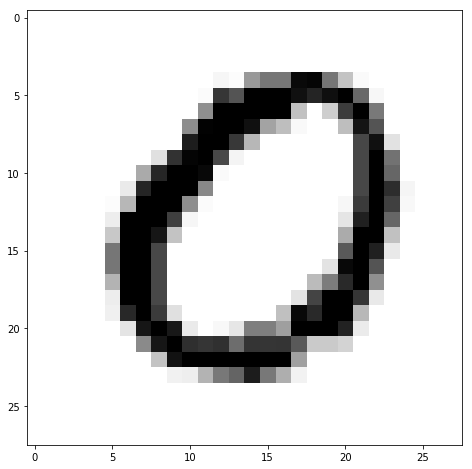

In [61]:
#### PREDICTION A SINGLE SAMPLE OF DATA ####

index = 1000
# lets pull out a single row from the design matrix
sample = X_test[index] 
digit = X_test[index].reshape(28,28)
# Lets pull out the corresponding label from the tagret vector:
label = y_test[index]
print("Image is labeled:",label)
print("Network prediction",My_Network.predict([sample]))

plt.figure(figsize=(8,8))
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

## Under the Hood - Using Linear Algbrea
The exact weighting matricies and bais vectors can be extracted from the trained network instance. We can use these the "manually" re-create this prediction using repeated variation of the equation in the 2nd cell. Lets extract the matricies and manually assign them values.

In [62]:
#### EXACT WEIGHTING MATRICIES & BAIS VECTORS ####

weights = My_Network.coefs_
biases = My_Network.intercepts_
print("Number of weighting Matrices:",len(weights))
print("Number of bias Vector:",len(biases))

# we can also examine the shapes
for W,b in zip(weights,biases):
    print("\tMatrix shape:",W.shape)
    print("\tvector shape:",b.shape)

Number of weighting Matrices: 3
Number of bias Vector: 3
	Matrix shape: (784, 100)
	vector shape: (100,)
	Matrix shape: (100, 100)
	vector shape: (100,)
	Matrix shape: (100, 10)
	vector shape: (10,)


To see the linear algebra in action, lets "hard-code" the layers of the forward-propagations system. First, let's assign each matrix and vector it's own variable. And select a sample from the testing designmatic "X_test" to pass through the network manually. 
For more details on the ReLU activation function, please see:
https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7

In [68]:
#### ASSIGN WEIGHTS & BIASES ####

W0,W1,W2 = weights[0],weights[1],weights[2]
b0,b1,b2 = biases[0],biases[1],biases[2]

# define our activation function
def ReLU(vec):
    """ Rectified Linear Unit Activation Function for elements in vector"""
    vec = vec.ravel()
    for elem in vec:
        if elem <= 0:
            elem -= elem
    return vec.reshape(-1,1)
        

# Note that '@' is Python for standard matrix-multiplications

In [69]:
#### FORWARD PASS THROUGH NETWORK ####

# input feature vector, same sample as above
x0 = sample.reshape(-1,1)
print("Input shape",x0.shape)

# 1st hidden layer
a1 = W0.T @ x0 + b0.reshape(-1,1)
x1 = ReLU(a1)
print("Layer 1 shape:",x1.shape)

# 2nd hidden layer
a2 = ReLU(W1.T @ x1 + b1.reshape(-1,1))
x2 = ReLU(a2)
print("Layer 2 shape:",x2.shape)

# output layer
a3 = W2.T @ x2 + b2.reshape(-1,1)
x3 = ReLU(a3)
print("Layer 3 shape:",x3.shape)

# TIP: Checking the dimesnions of each object is a great way to make sure everything is running properly!

Input shape (784, 1)
Layer 1 shape: (100, 1)
Layer 2 shape: (100, 1)
Layer 3 shape: (10, 1)


We have now sucessfully pased the input vector through our neural network by simply repeating the equation from the 1st cell until we reach the output layer! Notice how along the way we've had to do some transposing and reshaping- this is just a property of how sklearn stores the numpy arrays efficiently. It's yet another reason why we have to very careful about the dimensions of our operators. Finally, let's check our prediction:

In [70]:
#### LAST LAYER ACTIVATIONS ####
output_activations = x3.ravel()
print("Network output for this sample:\n")
print(output_activations)

Network output for this sample:

[ 1329.78594357 -1243.01565051  1929.42060143  1882.59319622
  1081.52750133 -1741.1441035   1382.83082564  -506.1972348
    52.45654206   190.80076882]
